In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from time import time
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score, mean_squared_error,explained_variance_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [38]:
df= pd.read_csv('CE802_P3_Data.csv')
df.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.00,1.73,3.14,5.73,-5.48,-743.61,152.20,Europe,3,1577.82,-383.82,12,-2289.14,-19.69,High,25354.83,167.75
1,9.84,3.46,6.02,14.42,-10.94,-820.35,68.56,Rest,4,1884.69,-488.34,6,-2899.20,-19.46,Very low,32380.17,704.46
2,4.14,-1.95,6.96,4.27,-7.94,-818.43,107.86,Rest,4,2063.79,-287.76,6,-2885.52,-20.57,Very high,28882.38,302.43
3,20.06,-3.34,3.76,4.78,-6.30,-814.53,147.04,UK,7,1319.19,-435.54,4,-2319.80,-20.24,Very high,28523.04,2420.98
4,63.63,-0.97,11.08,5.66,-9.60,-847.41,99.70,Europe,1,1921.14,-246.45,10,-1344.40,-21.90,Medium,27915.81,271.65


In [39]:
df_test= pd.read_csv('CE802_P3_Test.csv')
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,USA,2,3391.35,-415.41,6,-1460.14,-20.55,Low,31369.98,NaN
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,Rest,2,3479.19,-320.73,2,-2301.76,-27.90,Low,29173.89,NaN
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,USA,5,918.93,-379.44,4,-2589.08,-20.52,Very low,17248.26,NaN
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,Europe,2,2657.43,-491.28,6,-1767.44,-25.81,Low,15450.54,NaN
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,Rest,4,2739.96,-378.48,10,-1823.32,-23.11,Very low,35745.03,NaN


In [40]:
df.count()

F1        1500
F2        1500
F3        1500
F4        1500
F5        1500
F6        1500
F7        1500
F8        1500
F9        1500
F10       1500
F11       1500
F12       1500
F13       1500
F14       1500
F15       1500
F16       1500
Target    1500
dtype: int64

In [41]:
df.isnull().sum().sum()

0

In [42]:
df.corr()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F16,Target
F1,1.000000,0.014330,0.059413,-0.005763,0.032332,-0.027544,0.011987,0.046442,0.040372,0.006548,-0.013561,0.006771,-0.001758,0.066430,0.027713
F2,0.014330,1.000000,-0.018861,0.021228,0.017546,0.008484,-0.012457,0.026931,0.039825,-0.004979,0.006276,0.019297,-0.025476,0.042207,0.011330
F3,0.059413,-0.018861,1.000000,-0.022325,0.037862,0.026478,0.046542,-0.028201,-0.012850,-0.017902,-0.013474,0.005397,-0.032430,0.060349,0.357137
F4,-0.005763,0.021228,-0.022325,1.000000,0.009609,0.014407,0.000099,0.003647,-0.041882,0.050148,0.005589,-0.001317,-0.036053,-0.007184,0.346373
F5,0.032332,0.017546,0.037862,0.009609,1.000000,-0.031183,0.000302,-0.002310,-0.004091,0.012025,-0.004793,-0.023763,0.020489,-0.006157,0.020443
F6,-0.027544,0.008484,0.026478,0.014407,-0.031183,1.000000,-0.009240,0.016949,-0.016704,-0.002309,0.007359,0.072085,0.006407,-0.012488,0.031407
F7,0.011987,-0.012457,0.046542,0.000099,0.000302,-0.009240,1.000000,-0.018839,-0.051243,0.012594,-0.011457,0.006295,-0.027557,0.007560,0.430990
F9,0.046442,0.026931,-0.028201,0.003647,-0.002310,0.016949,-0.018839,1.000000,0.007670,0.000822,0.006516,0.014783,-0.022900,0.004651,0.193704
F10,0.040372,0.039825,-0.012850,-0.041882,-0.004091,-0.016704,-0.051243,0.007670,1.000000,0.061850,-0.002825,0.007113,-0.000184,-0.007832,-0.263022
F11,0.006548,-0.004979,-0.017902,0.050148,0.012025,-0.002309,0.012594,0.000822,0.061850,1.000000,-0.064451,-0.001042,0.035125,0.013438,0.015412


In [43]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
F1,1500.0,NaN,NaN,NaN,63.602773,774.154296,0.0,0.13,1.01,6.805,27474.53
F2,1500.0,NaN,NaN,NaN,-0.104847,3.040026,-10.17,-2.06,-0.0,1.875,9.6
F3,1500.0,NaN,NaN,NaN,8.109187,5.812853,0.08,3.815,6.74,10.945,45.14
F4,1500.0,NaN,NaN,NaN,4.04166,2.893909,0.04,1.945,3.415,5.4925,23.39
F5,1500.0,NaN,NaN,NaN,-8.765747,6.048501,-27.62,-13.0,-8.76,-4.52,9.28
F6,1500.0,NaN,NaN,NaN,-815.3494,126.724179,-1658.25,-875.3475,-815.535,-752.13,-243.84
F7,1500.0,NaN,NaN,NaN,123.19192,58.613624,-56.18,83.9,121.58,161.92,328.1
F8,1500,4,Rest,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN
F9,1500.0,NaN,NaN,NaN,3.947333,1.836702,0.0,3.0,4.0,5.0,11.0
F10,1500.0,NaN,NaN,NaN,1334.90566,904.26205,-1743.24,732.36,1324.155,1962.1275,4487.55


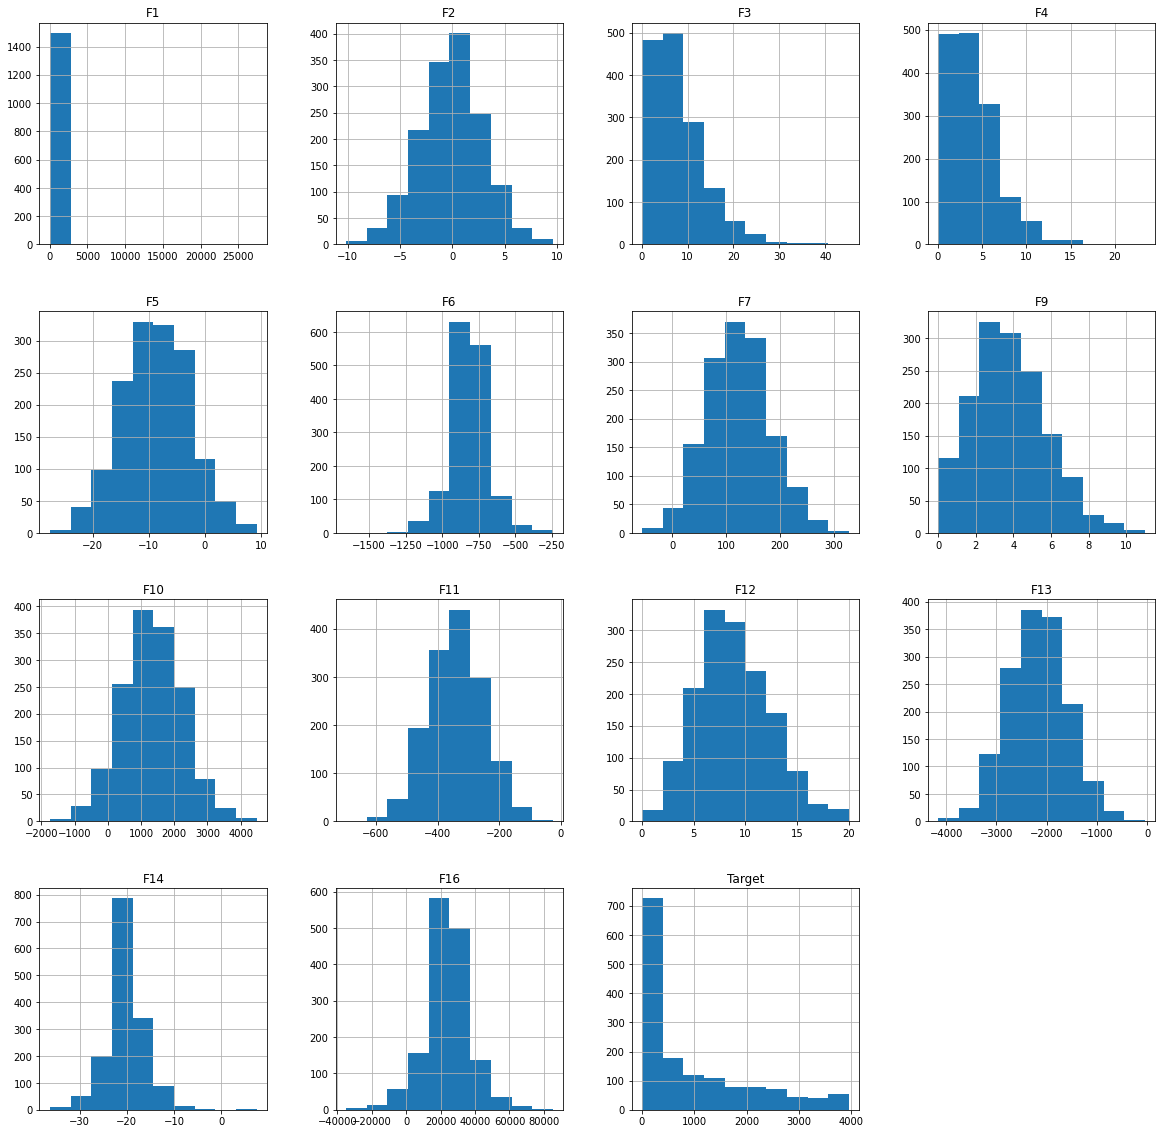

In [44]:
p = df.hist(figsize = (20,20))

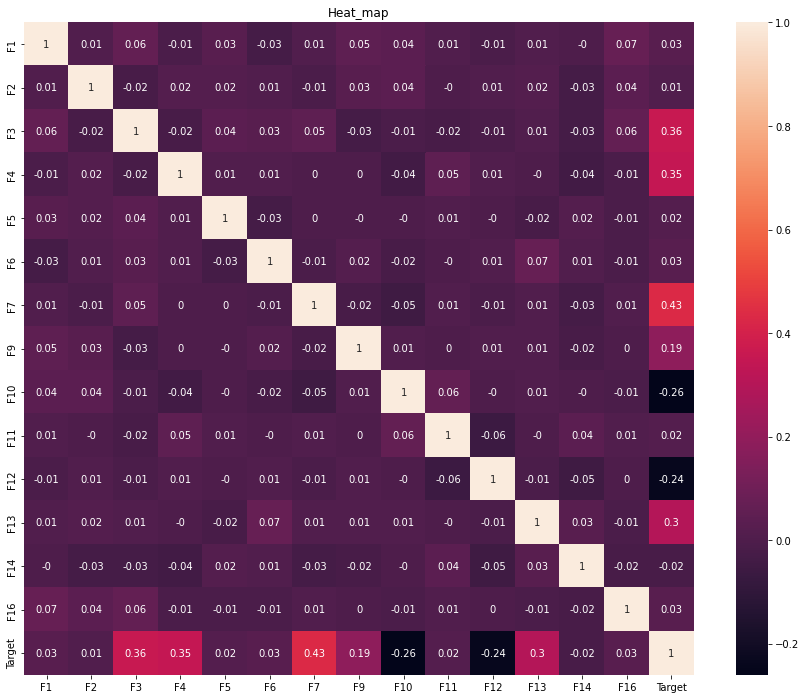

In [45]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.corr(),2),annot=True)
plt.title('Heat_map');
plt.show()

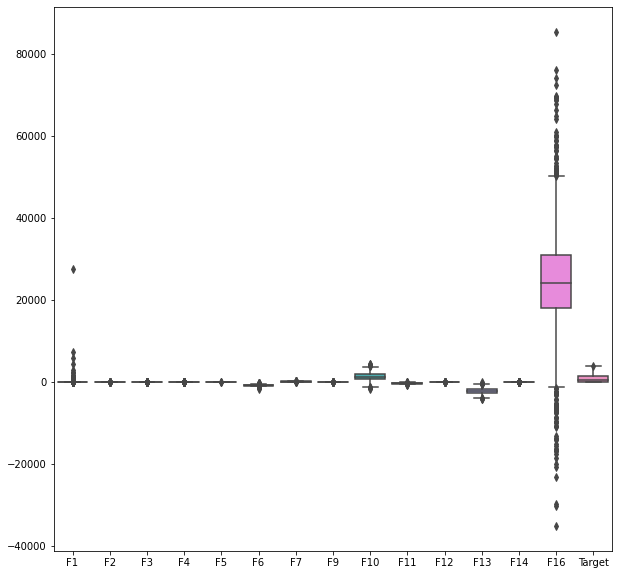

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)
plt.show()

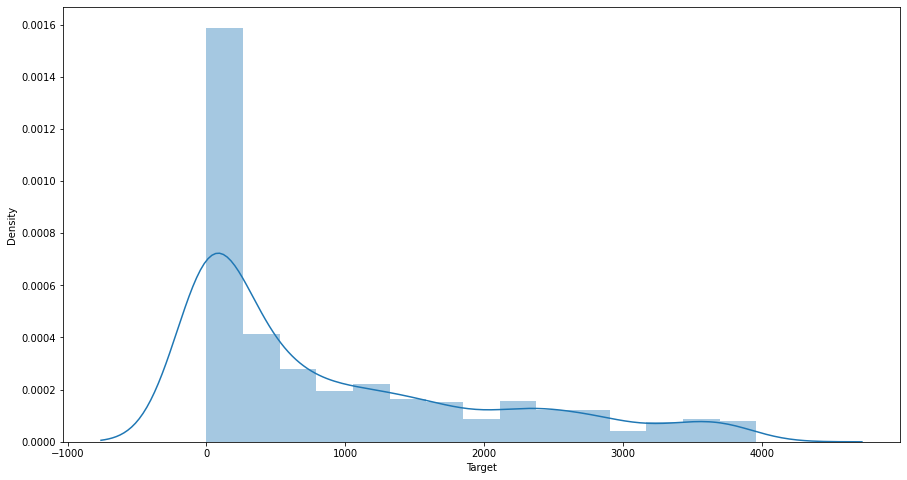

In [47]:
plt.figure(figsize=(15,8))
plt.tight_layout()
sns.distplot(df['Target'])
plt.show()

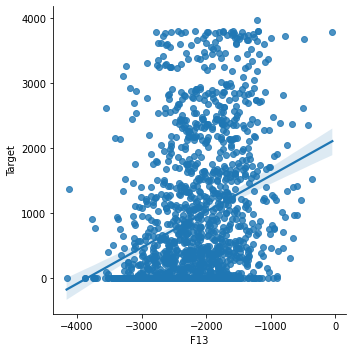

In [48]:
sns.lmplot(x="F13", y="Target", data=df)

# One Hot Encoding 

In [49]:
df = pd.get_dummies(data=df,columns=['F8'])
df.head()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F15,F16,Target,F8_Europe,F8_Rest,F8_UK,F8_USA
0,0.00,1.73,3.14,5.73,-5.48,-743.61,152.20,3,1577.82,-383.82,12,-2289.14,-19.69,High,25354.83,167.75,1,0,0,0
1,9.84,3.46,6.02,14.42,-10.94,-820.35,68.56,4,1884.69,-488.34,6,-2899.20,-19.46,Very low,32380.17,704.46,0,1,0,0
2,4.14,-1.95,6.96,4.27,-7.94,-818.43,107.86,4,2063.79,-287.76,6,-2885.52,-20.57,Very high,28882.38,302.43,0,1,0,0
3,20.06,-3.34,3.76,4.78,-6.30,-814.53,147.04,7,1319.19,-435.54,4,-2319.80,-20.24,Very high,28523.04,2420.98,0,0,1,0
4,63.63,-0.97,11.08,5.66,-9.60,-847.41,99.70,1,1921.14,-246.45,10,-1344.40,-21.90,Medium,27915.81,271.65,1,0,0,0


# Ordianl Encoding

In [51]:
df['F15']= np.where(df['F15']=='Very low',0,df['F15'])
df['F15']= np.where(df['F15']=='Low',1,df['F15'])
df['F15']= np.where(df['F15']=='Medium',2,df['F15'])
df['F15']= np.where(df['F15']=='High',3,df['F15'])
df['F15']= np.where(df['F15']=='Very high',4,df['F15'])


In [52]:
df.head()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F15,F16,Target,F8_Europe,F8_Rest,F8_UK,F8_USA
0,0.00,1.73,3.14,5.73,-5.48,-743.61,152.20,3,1577.82,-383.82,12,-2289.14,-19.69,3,25354.83,167.75,1,0,0,0
1,9.84,3.46,6.02,14.42,-10.94,-820.35,68.56,4,1884.69,-488.34,6,-2899.20,-19.46,0,32380.17,704.46,0,1,0,0
2,4.14,-1.95,6.96,4.27,-7.94,-818.43,107.86,4,2063.79,-287.76,6,-2885.52,-20.57,4,28882.38,302.43,0,1,0,0
3,20.06,-3.34,3.76,4.78,-6.30,-814.53,147.04,7,1319.19,-435.54,4,-2319.80,-20.24,4,28523.04,2420.98,0,0,1,0
4,63.63,-0.97,11.08,5.66,-9.60,-847.41,99.70,1,1921.14,-246.45,10,-1344.40,-21.90,2,27915.81,271.65,1,0,0,0


#Categories X and Y value and Train x and Y value

In [60]:
X= df.drop(columns=['Target'])
y=df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [61]:
scale = StandardScaler()
X_train_scale = pd.DataFrame(scale.fit_transform(X_train), columns=X_train.columns)
X_test_scale = pd.DataFrame(scale.transform(X_test), columns=X_test.columns)


# Linear Regression

In [62]:
Param = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

LR_Model = LinearRegression()

best_model = GridSearchCV(estimator = LR_Model, param_grid = Param, cv = 10) #,n_jobs=-1,scoring='accuracy')

best_model.fit(X_train_scale, y_train)
print(best_model.best_params_,'\n')
print(best_model.best_estimator_)

LR_Model = best_model.best_estimator_
y_train_pred = LR_Model.predict(X_train_scale)
y_test_pred = LR_Model.predict(X_test_scale)

print('Score on training data: ',round(LR_Model.score(X_train_scale, y_train),3))
print('Score on validation data: ',round(LR_Model.score(X_test_scale, y_test),3))
print("Mean absolute error:", mean_absolute_error(y_test, y_test_pred))
print("Mean Squared Error :" , mean_squared_error(y_test, y_test_pred))  
print('Root Mean Squared Error for train',np.sqrt(mean_squared_error(y_train,LR_Model.predict(X_train_scale))))
print('Root Mean Squared Error for test',np.sqrt(mean_squared_error(y_test,LR_Model.predict(X_test_scale))))



{'copy_X': True, 'fit_intercept': True, 'normalize': True} 

LinearRegression(normalize=True)
Score on training data:  0.787
Score on validation data:  0.801
Mean absolute error: 392.8597458144639
Mean Squared Error : 253294.4618899413
Root Mean Squared Error for train 500.04762535105766
Root Mean Squared Error for test 503.28367933993377


In [63]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

61.22066495385752
[ 6.99873119e-03  7.87952165e+00  6.51832057e+01  1.30478890e+02
  7.22861019e-01 -9.30085266e-02  7.42813407e+00  1.28786383e+02
 -2.79895583e-01  1.34214261e-02 -6.50332921e+01  5.10537644e-01
  1.75847758e+00  1.52380139e+02  1.34183718e-03 -4.42064459e+02
  4.44520023e+02  8.40389716e+01 -8.64945363e+01]


In [65]:
y_pred = regressor.predict(X_test)


In [66]:
y_test_Fl =np.array(y_test)
y_pred_Fl =np.array(y_pred)

In [67]:
df = pd.DataFrame({'Actual': y_test_Fl.flatten(), 'Predicted': y_pred_Fl.flatten()})
df

,Actual,Predicted
0,421.37,524.533445
1,707.73,1023.740839
2,0.00,247.604003
3,1910.08,1919.918945
4,1043.89,1552.573797
...,...,...
295,2686.19,2589.843032
296,0.00,-745.665963
297,0.00,477.267643
298,40.59,-130.295570


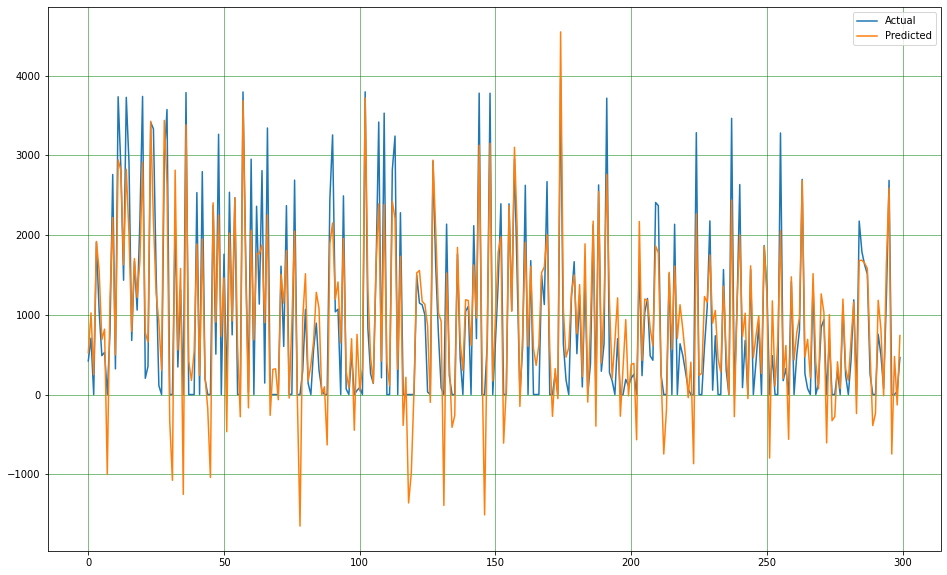

In [68]:

df.plot(kind='line',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 389.7191619921048
Mean Squared Error: 251906.61546641932
Root Mean Squared Error: 501.902994079951


# Random Forest Regressor

In [71]:
param = {"n_estimators":[100,200,300],"max_features":[4,5,6],"max_depth":[6,7,8], "min_samples_split":[5,10,20,30]} 


RF = RandomForestRegressor(random_state=1)

New_best_model = GridSearchCV(estimator = RF, param_grid = param, cv = 10) #,n_jobs=-1,scoring='accuracy')

New_best_model.fit(X_train_scale, y_train)
print(New_best_model.best_params_,'\n')
print(New_best_model.best_estimator_)

RF_Model_N = New_best_model.best_estimator_
y_train_pred_RF = RF_Model_N.predict(X_train_scale)
y_test_pred_RF = RF_Model_N.predict(X_test_scale)

print('Score on training data: ',round(RF_Model_N.score(X_train_scale, y_train),3))
print('Score on validation data: ',round(RF_Model_N.score(X_test_scale, y_test),3))
print("Mean absolute error:", mean_absolute_error(y_test, y_test_pred_RF))
print("Mean Squared Error :" , mean_squared_error(y_test, y_test_pred_RF))
print('Root Mean Squared Error for train',np.sqrt(mean_squared_error(y_train,RF_Model_N.predict(X_train_scale))))
print('Root Mean Squared Error for validation',np.sqrt(mean_squared_error(y_test,RF_Model_N.predict(X_test_scale))))



{'max_depth': 8, 'max_features': 6, 'min_samples_split': 5, 'n_estimators': 300} 

RandomForestRegressor(max_depth=8, max_features=6, min_samples_split=5,
                      n_estimators=300, random_state=1)
Score on training data:  0.886
Score on validation data:  0.687
Mean absolute error: 481.8810723166451
Mean Squared Error : 399126.94470185606
Root Mean Squared Error for train 364.9707670592495
Root Mean Squared Error for validation 631.7649441856172


# Decision Tree Regressor

In [72]:
param ={'max_depth': [6,8,10],'max_features':[6,8,10],'min_samples_leaf':[2,4,6,8,10],'max_leaf_nodes':[20,30,40], "min_samples_split":[2,4,6,8]}


DT_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator = DT_model, param_grid = param, cv = 5) #,n_jobs=-1,scoring='accuracy')

grid_search.fit(X_train_scale, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

DT_Model_N = grid_search.best_estimator_
y_train_pred_DT = DT_Model_N.predict(X_train_scale)
y_test_pred_DT = DT_Model_N.predict(X_test_scale)

print('Score on training data: ',round(DT_Model_N.score(X_train_scale, y_train),3))
print('Score on validation data: ',round(DT_Model_N.score(X_test_scale, y_test),3))
print("Mean absolute error:", mean_absolute_error(y_test, y_test_pred_DT))
print("Mean Squared Error :" , mean_squared_error(y_test, y_test_pred_DT))
print('Root Mean Squared Error for train',np.sqrt(mean_squared_error(y_train,DT_Model_N.predict(X_train_scale))))
print('Root Mean Squared Error for validation',np.sqrt(mean_squared_error(y_test,DT_Model_N.predict(X_test_scale))))

{'max_depth': 10, 'max_features': 10, 'max_leaf_nodes': 40, 'min_samples_leaf': 10, 'min_samples_split': 8} 

DecisionTreeRegressor(max_depth=10, max_features=10, max_leaf_nodes=40,
                      min_samples_leaf=10, min_samples_split=8)
Score on training data:  0.661
Score on validation data:  0.487
Mean absolute error: 572.8284166020543
Mean Squared Error : 655066.8197617102
Root Mean Squared Error for train 630.1249529739306
Root Mean Squared Error for validation 809.361983145805


# Test Data

In [73]:
df_test = pd.get_dummies(data=df_test, columns=['F8'])
df_test.head()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F15,F16,Target,F8_Europe,F8_Rest,F8_UK,F8_USA
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,2,3391.35,-415.41,6,-1460.14,-20.55,Low,31369.98,NaN,0,0,0,1
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,2,3479.19,-320.73,2,-2301.76,-27.90,Low,29173.89,NaN,0,1,0,0
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,5,918.93,-379.44,4,-2589.08,-20.52,Very low,17248.26,NaN,0,0,0,1
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,2,2657.43,-491.28,6,-1767.44,-25.81,Low,15450.54,NaN,1,0,0,0
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,4,2739.96,-378.48,10,-1823.32,-23.11,Very low,35745.03,NaN,0,1,0,0


In [74]:
df_test['F15']= np.where(df_test['F15']=='Very low',0,df_test['F15'])
df_test['F15']= np.where(df_test['F15']=='Low',1,df_test['F15'])
df_test['F15']= np.where(df_test['F15']=='Medium',2,df_test['F15'])
df_test['F15']= np.where(df_test['F15']=='High',3,df_test['F15'])
df_test['F15']= np.where(df_test['F15']=='Very high',4,df_test['F15'])

In [75]:
X_pred_test = df_test.drop(columns=['Target'], axis=1, inplace=False)
X_pred_test.head()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F15,F16,F8_Europe,F8_Rest,F8_UK,F8_USA
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,2,3391.35,-415.41,6,-1460.14,-20.55,1,31369.98,0,0,0,1
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,2,3479.19,-320.73,2,-2301.76,-27.90,1,29173.89,0,1,0,0
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,5,918.93,-379.44,4,-2589.08,-20.52,0,17248.26,0,0,0,1
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,2,2657.43,-491.28,6,-1767.44,-25.81,1,15450.54,1,0,0,0
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,4,2739.96,-378.48,10,-1823.32,-23.11,0,35745.03,0,1,0,0


In [76]:
X_test_S = pd.DataFrame(scale.transform(X_pred_test), columns=X_pred_test.columns)
X_test_S.head()

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F15,F16,F8_Europe,F8_Rest,F8_UK,F8_USA
0,-0.083040,-0.022752,-0.738065,-0.850059,0.345966,-0.895155,1.858665,-1.057567,2.254285,-0.824751,-0.503110,1.196264,-0.125745,-0.684236,0.536908,-0.560668,-0.613308,-0.576067,1.787681
1,-0.082051,1.042265,-0.974737,-0.699313,0.703618,0.880581,-0.283288,-1.057567,2.350468,0.231443,-1.620097,-0.223418,-1.883744,-0.684236,0.371674,-0.560668,1.630502,-0.576067,-0.559384
2,-0.082656,-0.009355,-0.153147,-1.249712,-0.894333,0.138983,-1.537106,0.578548,-0.452948,-0.423491,-1.061603,-0.708082,-0.118569,-1.387820,-0.525615,-0.560668,-0.613308,-0.576067,1.787681
3,-0.076838,0.071023,-0.146385,0.997457,0.437840,0.101018,-1.526677,-1.057567,1.450662,-1.671113,-0.503110,0.677897,-1.383850,-0.684236,-0.660876,1.783588,-0.613308,-0.576067,-0.559384
4,-0.082784,2.110630,-0.761732,-1.004311,-1.304485,1.257436,1.754376,0.033177,1.541031,-0.412782,0.613878,0.583636,-0.738055,-1.387820,0.866089,-0.560668,1.630502,-0.576067,-0.559384


In [77]:
y_test_pred = LR_Model.predict(X_test_S)

In [78]:
df_test['Target']=y_test_pred
df_test

,F1,F2,F3,F4,F5,F6,F7,F9,F10,F11,F12,F13,F14,F15,F16,Target,F8_Europe,F8_Rest,F8_UK,F8_USA
0,0.04,-0.21,3.68,1.54,-6.70,-929.34,234.18,2,3391.35,-415.41,6,-1460.14,-20.55,1,31369.98,589.591996,0,0,0,1
1,0.89,2.97,2.28,1.97,-4.52,-700.62,106.84,2,3479.19,-320.73,2,-2301.76,-27.90,1,29173.89,-100.408004,0,1,0,0
2,0.37,-0.17,7.14,0.40,-14.26,-796.14,32.30,5,918.93,-379.44,4,-2589.08,-20.52,0,17248.26,-418.408004,0,0,0,1
3,5.37,0.07,7.18,6.81,-6.14,-801.03,32.92,2,2657.43,-491.28,6,-1767.44,-25.81,1,15450.54,-360.408004,1,0,0,0
4,0.26,6.16,3.54,1.10,-16.76,-652.08,227.98,4,2739.96,-378.48,10,-1823.32,-23.11,0,35745.03,849.591996,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.27,-1.82,3.06,1.81,-0.56,-843.15,230.60,0,669.90,-365.52,4,-3161.20,-18.92,2,23327.58,579.591996,0,0,1,0
1496,4.69,0.87,4.88,5.08,-6.64,-827.76,90.38,6,3327.69,-373.65,6,-2326.00,-16.44,2,17878.32,431.591996,0,0,1,0
1497,15.05,3.14,2.64,3.74,-3.92,-716.73,55.62,4,238.56,-336.75,6,-2140.10,-19.13,0,32403.66,125.591996,0,0,0,1
1498,0.04,-1.55,11.22,6.41,-10.80,-869.10,82.80,6,4278.54,-357.03,8,-2232.92,-19.19,0,19319.28,173.591996,0,0,0,1


In [79]:
from google.colab import files
df_test.to_csv('CE802_P2_Test_output.csv') 
files.download('CE802_P2_Test_output.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>